In [2]:
import pandas as pd 
import numpy as  np 

In [3]:
data=pd.read_csv('compresive_strength_concrete.csv', engine="python" )

In [4]:
data.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [5]:
len(data.columns)

9

In [6]:
data.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [7]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [8]:
len(data)

1030

In [9]:
#Changing th columns name 
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [10]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregare,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CC_Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregare     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


The Data has no null values and all the data is in numerical form 

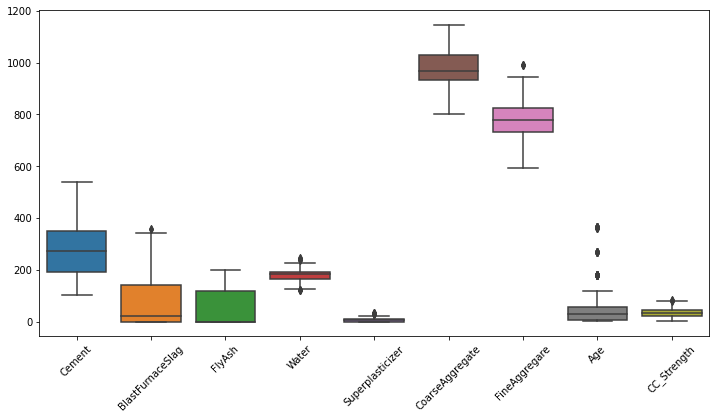

In [13]:
#finding Outliers 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Observations
Age column appears to be having maximum number of outliers
Slag, Water, superplastic, fineagg features have some outliers
All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale
the data so as to avoid bias in algorithms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

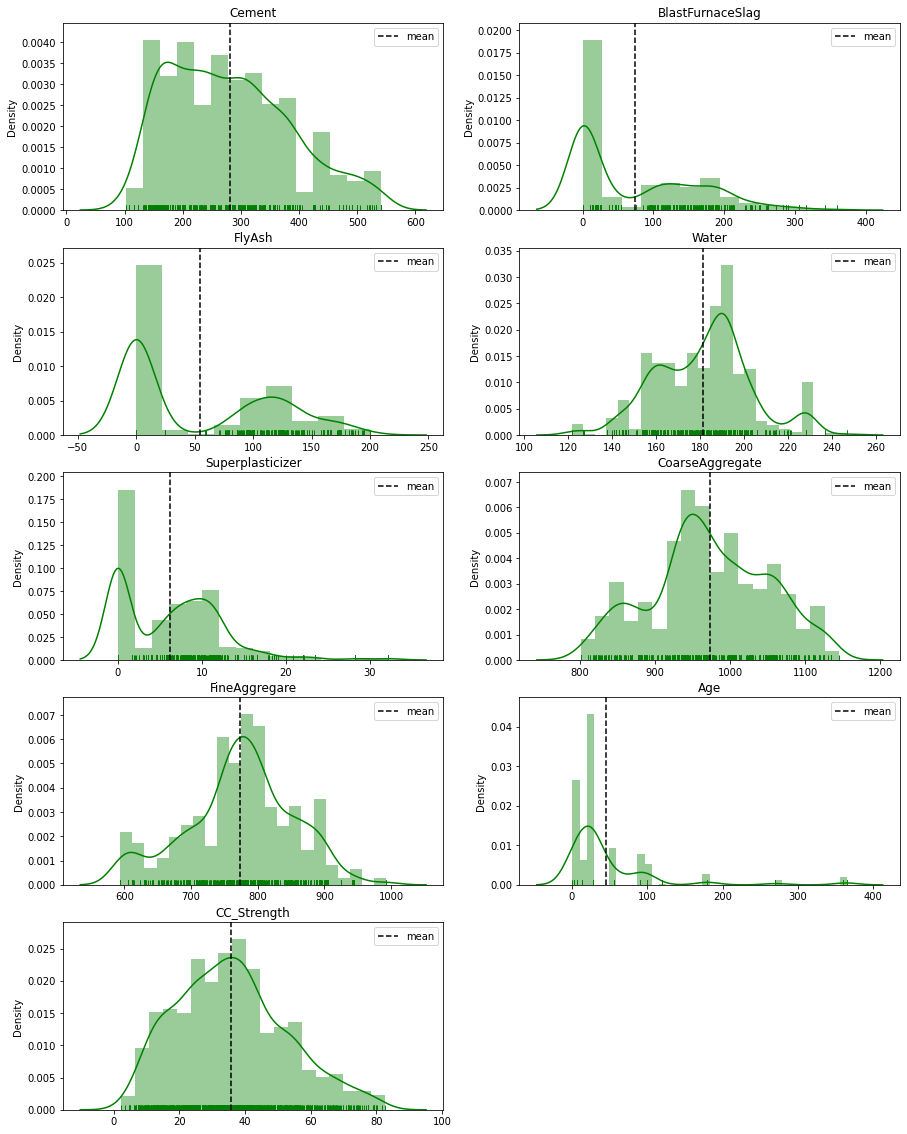

In [14]:
import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(5,2,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

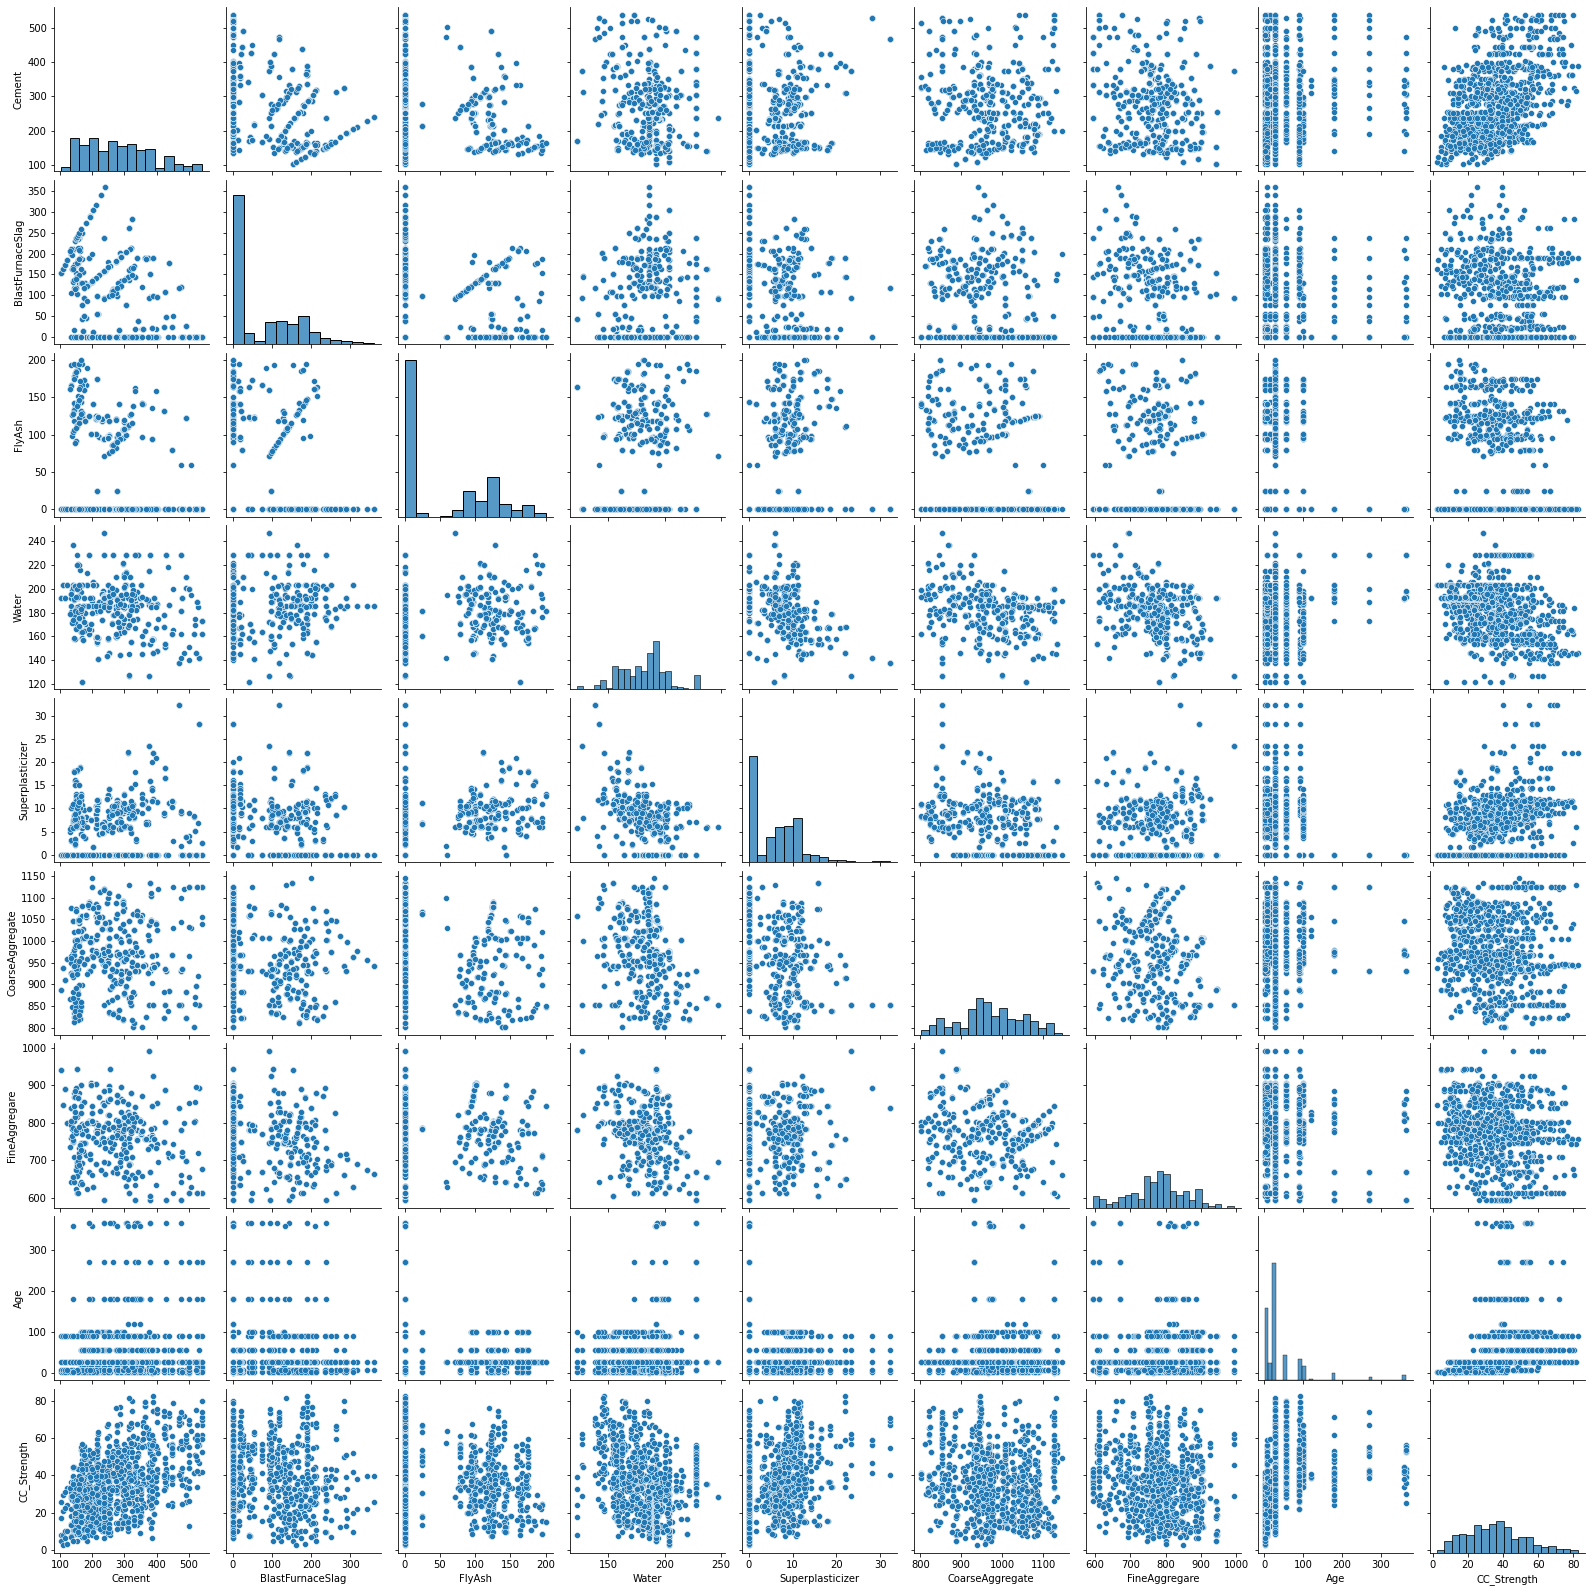

In [15]:
sns.pairplot(data)
plt.show()

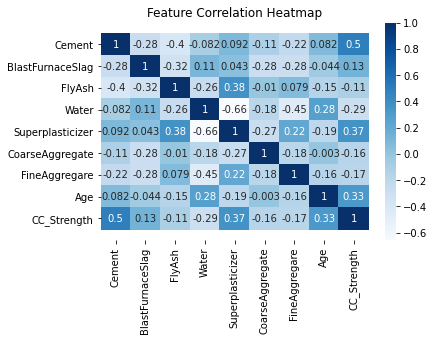

In [16]:
corr = data.corr()

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

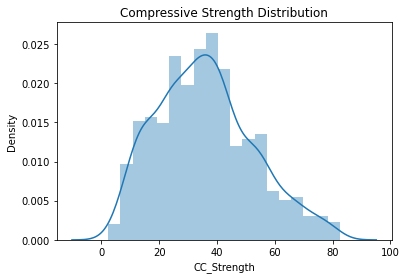

In [17]:
ax = sns.distplot(data.CC_Strength)
ax.set_title("Compressive Strength Distribution")

Compressive strength increases with amount of cement
Compressive strength increases with age
Cement with low age requires more cement for higher strength
The older the cement is the more water it requires
Concrete strength increases when less water is used in preparing it

In [18]:
X = data.iloc[:,:-1]         
y = data.iloc[:,-1]  

Splitting the Data 


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,train_size=0.50, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from keras import models
from keras import layers
def model_build():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(8,)))
  model.add(layers.Dense(15, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  return model 

In [22]:
model=model_build()

In [23]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [27]:
model.fit(X_train,y_train,epochs=500 )

Epoch 1/500
17/17 [==============================] - 0s 2ms/step - loss: 100.0178 - mae: 7.9136
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 99.9344 - mae: 7.9073
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 99.9016 - mae: 7.8976
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 99.8195 - mae: 7.9153
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 99.9461 - mae: 7.8937
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 100.0159 - mae: 7.9022
Epoch 7/500
17/17 [==============================] - 0s 1ms/step - loss: 99.8406 - mae: 7.9153
Epoch 8/500
17/17 [==============================] - 0s 1ms/step - loss: 99.6844 - mae: 7.9579
Epoch 9/500
17/17 [==============================] - 0s 2ms/step - loss: 99.7308 - mae: 7.9391
Epoch 10/500
17/17 [==============================] - 0s 1ms/step - loss: 99.6263 - mae: 7.9447
Epoch 11/500
17/17 [===========================

In [28]:
y_predict=model.predict(X_test)
y_predict

array([[55.344383, 55.480206, 55.346558, 55.360157, 55.35081 , 55.50672 ],
       [53.987583, 53.854996, 53.91903 , 53.926537, 53.889233, 53.915913],
       [65.93936 , 65.75415 , 65.68352 , 65.70177 , 65.73238 , 65.90337 ],
       ...,
       [31.832123, 31.972422, 31.870413, 31.711403, 31.938908, 31.981876],
       [39.593582, 39.188534, 39.4551  , 39.22885 , 39.743988, 39.209   ],
       [45.144894, 45.08284 , 45.038948, 45.035217, 45.10856 , 45.13045 ]],
      dtype=float32)